In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load Image and Preprocess
img = Image.open(r'C:\Users\heram\OneDrive\Documents\GitHub\DC-project\rabbit.png').convert('RGB')
img = np.array(img) / 255.0  # Normalize
img = torch.tensor(img).float().unsqueeze(0)  # Add batch dim


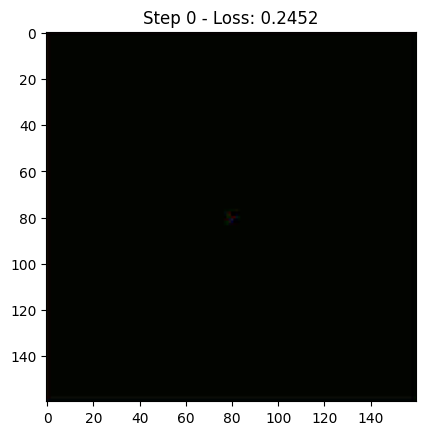

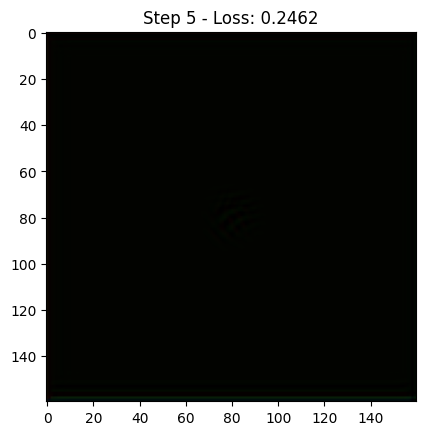

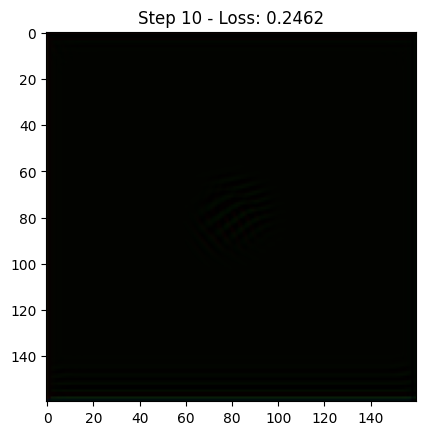

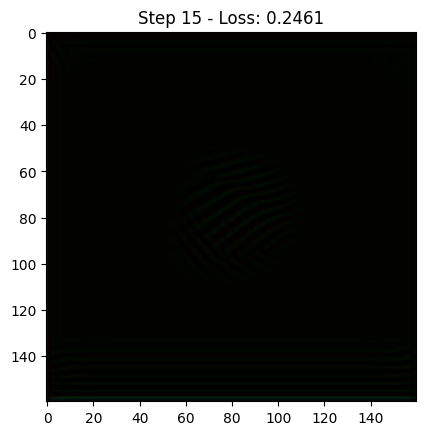

: 

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

class NeuralCA(nn.Module):
    def __init__(self, target_size=(160, 160)):
        super(NeuralCA, self).__init__()

        # First convolution: 3 input channels to 16 output channels
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)  # 3 input channels, 16 output channels
        
        # Define Sobel filters manually (used for edge detection)
        self.sobel_x_weight = torch.tensor([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype=torch.float32)
        self.sobel_y_weight = torch.tensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=torch.float32)
        self.identity_weight = torch.tensor([[0, 0, 0], [0, 1, 0], [0, 0, 0]], dtype=torch.float32)

        # Repeat the weights to match the input channels (16 channels)
        self.sobel_x_weight = self.sobel_x_weight.repeat(16, 1, 1, 1)
        self.sobel_y_weight = self.sobel_y_weight.repeat(16, 1, 1, 1)
        self.identity_weight = self.identity_weight.repeat(16, 1, 1, 1)

        # Second convolution to reduce the channels back to 3
        self.conv2 = nn.Conv2d(48, 3, kernel_size=3, padding=1)  # After combining Sobel, 48 channels

        # Fully connected layers (flatten the image for these layers)
        self.fc1 = nn.Linear(3 * target_size[0] * target_size[1], 128)
        self.fc2 = nn.Linear(128, 16)

        # Target image size
        self.target_size = target_size

    def forward(self, x, target, steps=30):
        # Ensure input has the correct shape
        if x.dim() == 4 and x.shape[1] != 3:
            x = x.permute(0, 3, 1, 2)

        # L2 loss (Mean Squared Error) calculation
        loss_fn = nn.MSELoss()

        # Generate the image progressively
        for step in range(steps):
            # Apply first convolution to the input image
            x = torch.relu(self.conv1(x))  # Apply ReLU after the first convolution

            # Apply Sobel filters and identity filter manually
            sobel_x_out = F.conv2d(x, self.sobel_x_weight, padding=1, groups=16)
            sobel_y_out = F.conv2d(x, self.sobel_y_weight, padding=1, groups=16)
            identity_out = F.conv2d(x, self.identity_weight, padding=1, groups=16)

            # Combine the outputs of all filters (concatenate along the channel dimension)
            x = torch.cat([sobel_x_out, sobel_y_out, identity_out], dim=1)

            # Apply second convolution to reduce the channels back to 3
            x = self.conv2(x)

            # **Important: Update the image with the output from the convolution**
            updated_image = F.relu(x) * 0.5 + x * 0.5  # Blend the generated image with the previous one

            # Gradually update the image by mixing original and generated pixels
            x = updated_image

            # Clamp values to stay in valid image range [0, 1] (optional, if using image data)
            x = torch.clamp(x, 0, 1)

            # L2 Loss computation
            loss = loss_fn(x, target)  # Compare generated image with target image

            # Print loss at every step (optional)
            if step % 5 == 0:  # Display progress every few steps
                plt.imshow(x.squeeze().detach().numpy().transpose(1, 2, 0))  # Show image
                plt.title(f"Step {step} - Loss: {loss.item():.4f}")
                plt.show()

        return x, loss


# Initialize the model
model = NeuralCA(target_size=(160, 160))

# Start with an image of size (1, 3, 160, 160) - one white pixel at the center
input_tensor = torch.zeros(1, 3, 160, 160)  # Start with a black image
input_tensor[0, :, 80, 80] = 1.0  # Set the central pixel to white

# Create a target image (for demonstration, we can set it to random or any desired target)
target_image = torch.zeros(1, 3, 160, 160)
target_image[0, :, 40:120, 40:120] = 1.0  # Set a square area in the middle to white (as an example)

# Run the model to generate the target image from the initial pixel
output, loss = model(input_tensor, target_image, steps=30)

# Print final loss and show final output image
print(f"Final Loss: {loss.item():.4f}")
plt.imshow(output.squeeze().detach().numpy().transpose(1, 2, 0))  # Final output image
plt.title(f"Final Image after Training")
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\heram\OneDrive\Documents\GitHub\DC-project\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 2168, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\heram\OneDrive\Documents\GitHub\DC-project\venv\Lib\site-packages\IPython\core\ultratb.py", line 1457, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\heram\OneDrive\Documents\GitHub\DC-project\venv\Lib\site-packages\IPython\core\ultratb.py", line 1348, in structured_traceback
    return VerboseTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\heram\OneDrive\Documents\GitHub\DC-project\venv\Lib\site-packages\IPython\core\ultratb.py", line 1195, in structured_traceback
    formatted_exception = self.format_exception_as_a_whole(etype, evalue, etb, number_of_lines_of_context,
  

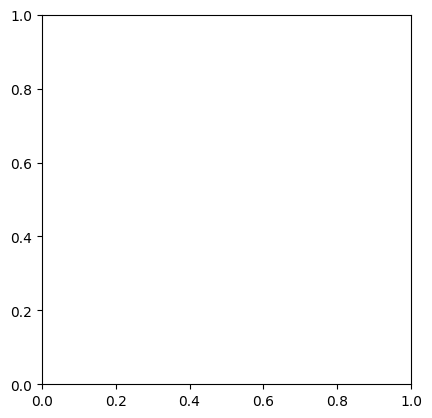

In [2]:
import torch
import matplotlib.pyplot as plt
target_image = torch.zeros(1, 3, 160, 160)
target_image[0, :, 40:120, 40:120] = 1.0 
plt.imshow(target_image)